In [1]:
import tensorflow as tf
import numpy

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

k = tf.matmul(x,W)+b

y = tf.nn.softmax(k)

sess = tf.Session()

saver = tf.train.Saver()
saver.restore(sess, '/Users/tglkwon/neovenezia/mnist_test/mnist_softmax.ckpt')

INFO:tensorflow:Restoring parameters from /Users/tglkwon/neovenezia/mnist_test/mnist_softmax.ckpt


In [2]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [3]:
from IPython.display import HTML

HTML(input_form + javascript)

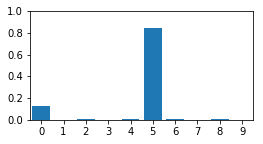

In [13]:
import matplotlib.pyplot as plt

p_val = sess.run(y, feed_dict={x:[image]})



fig = plt.figure(figsize=(4,2))

pred = p_val[0]

subplot = fig.add_subplot(1,1,1)

subplot.set_xticks(range(10))

subplot.set_xlim(-0.5,9.5)

subplot.set_ylim(0,1)

subplot.bar(range(10), pred, align='center')

plt.show()